<a href="https://colab.research.google.com/github/daniel-usp/MachineLearning/blob/main/RiscoMercado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%%**********************]  8 of 8 completed


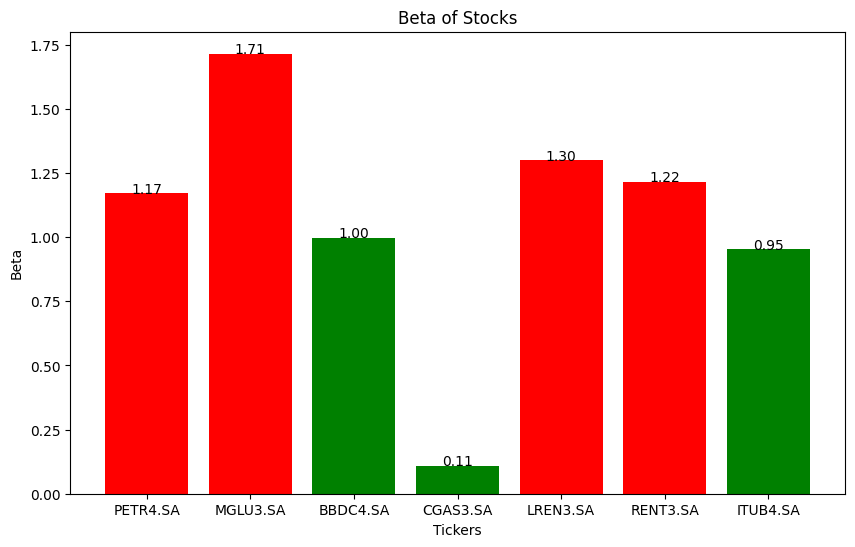

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Tickers list
tickers = ["PETR4.SA", "BOVA11.SA", "MGLU3.SA", "BBDC4.SA", "CGAS3.SA", "LREN3.SA", "RENT3.SA", "ITUB4.SA"]

# Download data
data = yf.download(tickers, start="2020-12-01", end="2023-12-01")['Adj Close']

# Calculate returns
returns = data.pct_change().dropna()

# Market returns (BOVA11 is used as a proxy for the market)
market_returns = returns["BOVA11.SA"]

# Calculating Betas
betas = {}
for ticker in tickers:
    if ticker != "BOVA11.SA":  # Exclude the market itself
        cov = returns[ticker].cov(market_returns)
        var = market_returns.var()
        beta = cov / var
        betas[ticker] = beta

# Creating the plot
plt.figure(figsize=(10, 6))

# Bar colors
colors = ['green' if beta < 1 else 'red' for beta in betas.values()]

# Plotting the betas
plt.bar(betas.keys(), betas.values(), color=colors)

# Adding labels
plt.xlabel('Tickers')
plt.ylabel('Beta')
plt.title('Beta of Stocks')
for i, beta in enumerate(betas.values()):
    plt.text(i, beta, f'{beta:.2f}', ha = 'center')

# Show the plot
plt.show()
